In [135]:
import glob
import sys
import os
import time
import json
import requests

import argparse
import pandas as pd
import numpy as np
import random
import boto3
import boto.s3.connection
from boto.s3.key import Key

from urllib.parse import urlparse
from urllib.request import urlretrieve 

import matplotlib.pyplot as plt
import gist
from sklearn.metrics.pairwise import cosine_similarity


In [4]:
image_root_path = '../image'
folders = os.listdir(image_root_path)
print('{} folders are found'.format(len(folders)))
folders

1 folders are found


['Boston-Massachusetts-US']

In [5]:
folder = 'Boston-Massachusetts-US'

In [6]:
files = os.listdir(image_root_path+'/'+folder)
print('{} files are found'.format(len(files)))
files[0:10]

58280 files are found


['15296865_17.jpg',
 '349347_9.jpg',
 '15227977_0.jpg',
 '957224_0.jpg',
 '4573388_3.jpg',
 '8187052_17.jpg',
 '8025718_2.jpg',
 '743211_30.jpg',
 '11334091_5.jpg',
 '232990_21.jpg']

In [7]:
image_name = image_root_path+'/'+folder+'/'+files[1]

In [8]:
image_name

'../image/Boston-Massachusetts-US/349347_9.jpg'

In [9]:
from PIL import Image
im = Image.open(image_name) # 读取图片
im.show() 

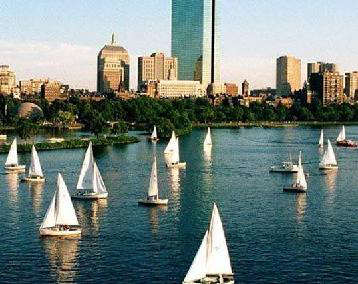

In [10]:
im

In [11]:
im = np.array(Image.open(image_name))

In [12]:
plt.show(im)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [11]:
from PIL import Image
import pylab as pl

In [53]:
image_name_2 = image_root_path+'/'+folder+'/'+files[2]
image_name_3 = image_root_path+'/'+folder+'/'+files[3]
image_name_4 = image_root_path+'/'+folder+'/'+files[4]

In [57]:
im_2 = Image.open(image_name_2)
im_3 = Image.open(image_name_3)
im_4 = Image.open(image_name_4)

In [101]:
image_path = image_root_path+'/'+folder+'/'
image_path

'../image/Boston-Massachusetts-US/'

In [109]:
from PIL import Image
import pylab as pl
import os
import math

def image_show(datapath,nums = 6,startImg = 0, **kwargs):
    '''
        Function: show nums of images involved in datapath folder starting from start_image or speicified by "imagelist" argument 
        Datapath: the folder containing images that to be shown
        nums: number of images that are gonna be displayed
        start_img: the index of the first picture
    '''
    fig_column = 4
    
    if 'imageList' in kwargs:
        image_list = kwargs['imageList']
        nums = min(nums,len(image_list)-startImg)       
    else:
        image_list = os.listdir(datapath)
        nums = min(nums,len(image_list)-startImg)    
    
    pl.figure(figsize = (fig_column*5,math.ceil(nums/fig_column)*5) )
    
    for i in range(nums):         
        pl.subplot(math.ceil(nums/fig_column),fig_column,i+1,title = image_list[startImg+i])
        img = Image.open(datapath+image_list[startImg+i])        
        pl.axis('off')        
        pl.imshow(img)
        
    

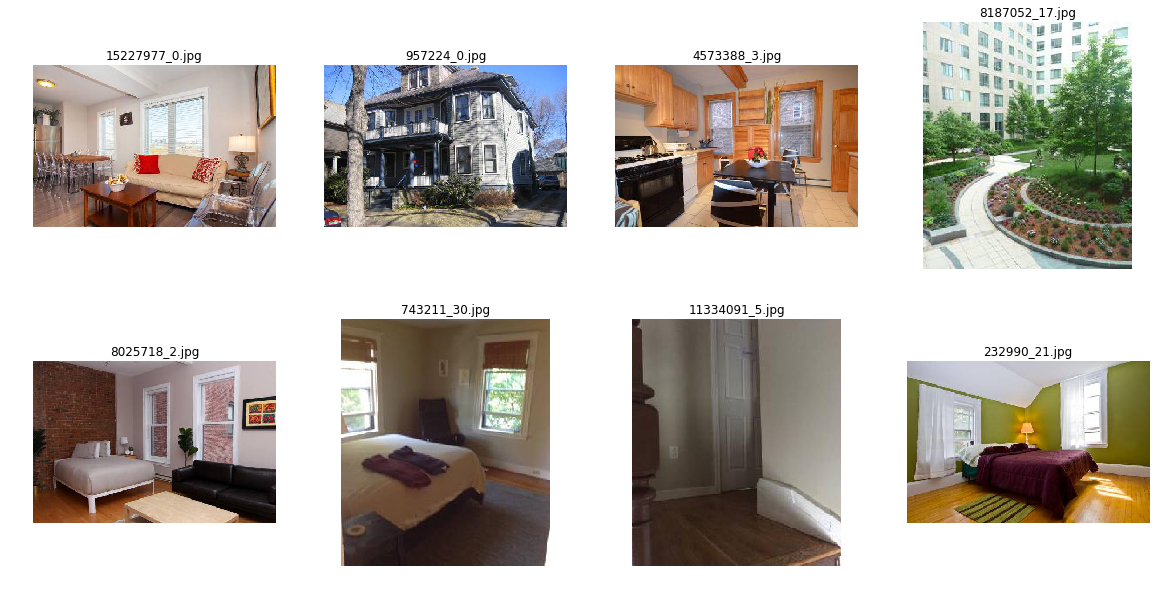

In [113]:
image_show(image_path,11,2,imageList = file_toy)

In [13]:
import gist

In [15]:
y = im.resize((50,50))

In [64]:
math.ceil(3/2)

2

In [14]:
im = np.array(Image.open(image_name))

In [80]:
descriptor = gist.extract(im)

In [84]:
descriptor.shape

(960,)

In [85]:
z = descriptor.reshape(1,-1)
z.shape

(1, 960)

In [70]:
np.reshape?


In [89]:
tmp = np.zeros((1,960))
com = np.concatenate((tmp,z),axis = 0)

In [91]:
com.shape

(2, 960)

In [79]:
tmp1.reshape((1,960))

ValueError: cannot reshape array of size 0 into shape (1,960)

In [64]:
z = np.append(tmp,tmp1)

In [65]:
z

array([], dtype=float64)

In [167]:
def gist_extraction(imgFolder,nums = 9,startImg = 0, **kwargs):
    '''
        Function: extract gist features for all the images in *imgFolder* or for *nums* of images starting from *startImg*
        Input:
            imgFolder: <string> file path of the image folder
            nums: <int> number of images that are gonna be displayed
            startImg: <int> the index of the first picture
        Output: 
            featureX: <matrix> a matrix of size (nums,960) where each row represents an image feature
            nameList:<list> a list of image name in accordance to the feature matrix
    '''
    nameList = []
    featureX = np.zeros((1,960))
    
    if 'imageList' in kwargs:
        image_list = kwargs['imageList']    
        nums = min(nums,len(image_list)-startImg)
        startImg = 0
    else:
        image_list = os.listdir(datapath)
        nums = min(nums,len(image_list)-startImg)
        
    for i in range(startImg,startImg+nums):
        image_name = imgFolder+ image_list[i]
        im = np.array(Image.open(image_name))
        feature_for_i = gist.extract(im)
        featureX = np.concatenate((featureX,feature_for_i.reshape(1,-1)),axis = 0)
        nameList.append(image_name)
    
    return featureX[1:,:], nameList
        
    

In [168]:
X,img_list = gist_extraction(image_path,nums = 12,startImg = 0, imageList = file_toy)

In [169]:
X.shape

(10, 960)

In [170]:
img_list

['../image/Boston-Massachusetts-US/15296865_17.jpg',
 '../image/Boston-Massachusetts-US/349347_9.jpg',
 '../image/Boston-Massachusetts-US/15227977_0.jpg',
 '../image/Boston-Massachusetts-US/957224_0.jpg',
 '../image/Boston-Massachusetts-US/4573388_3.jpg',
 '../image/Boston-Massachusetts-US/8187052_17.jpg',
 '../image/Boston-Massachusetts-US/8025718_2.jpg',
 '../image/Boston-Massachusetts-US/743211_30.jpg',
 '../image/Boston-Massachusetts-US/11334091_5.jpg',
 '../image/Boston-Massachusetts-US/232990_21.jpg']

In [133]:
X

array([[0.26244086, 0.25753239, 0.21390188, ..., 0.03656721, 0.03995967,
        0.03556732],
       [0.35146189, 0.25601238, 0.19714133, ..., 0.04510596, 0.04515167,
        0.04376129],
       [0.15198848, 0.14231145, 0.16144544, ..., 0.03657748, 0.03962434,
        0.04038066],
       ...,
       [0.19793442, 0.09660643, 0.11606111, ..., 0.03494006, 0.03662386,
        0.03828591],
       [0.11472421, 0.08031552, 0.08365469, ..., 0.03279321, 0.03103433,
        0.03331958],
       [0.14707671, 0.1666867 , 0.13062267, ..., 0.04105212, 0.04434299,
        0.04670498]])

In [95]:
files = os.listdir(image_root_path+'/'+folder)
print('{} files are found'.format(len(files)))
file_toy = files[0:10]

58280 files are found


In [96]:
file_toy

['15296865_17.jpg',
 '349347_9.jpg',
 '15227977_0.jpg',
 '957224_0.jpg',
 '4573388_3.jpg',
 '8187052_17.jpg',
 '8025718_2.jpg',
 '743211_30.jpg',
 '11334091_5.jpg',
 '232990_21.jpg']

In [226]:
z = cosine_similarity(X)

In [227]:
z

array([[1.        , 0.92372227, 0.91578695, 0.93283606, 0.94079142,
        0.75763036, 0.91387878, 0.76097375, 0.7752763 , 0.87986688],
       [0.92372227, 1.        , 0.79237677, 0.82767328, 0.81654891,
        0.89548898, 0.78698704, 0.86627547, 0.83475696, 0.74354892],
       [0.91578695, 0.79237677, 1.        , 0.92670909, 0.96665506,
        0.67201544, 0.95918261, 0.67716901, 0.7360434 , 0.98541421],
       [0.93283606, 0.82767328, 0.92670909, 1.        , 0.98142081,
        0.67878342, 0.97574879, 0.69034205, 0.73389219, 0.92129771],
       [0.94079142, 0.81654891, 0.96665506, 0.98142081, 1.        ,
        0.66562726, 0.98412205, 0.6754991 , 0.72769806, 0.95858035],
       [0.75763036, 0.89548898, 0.67201544, 0.67878342, 0.66562726,
        1.        , 0.64176872, 0.95721443, 0.92101802, 0.61875171],
       [0.91387878, 0.78698704, 0.95918261, 0.97574879, 0.98412205,
        0.64176872, 1.        , 0.65198858, 0.70762781, 0.96613919],
       [0.76097375, 0.86627547, 0.6771690

In [160]:
k = False

In [222]:
index = np.argwhere(z>0.95) 

In [218]:
index1 = index[:,0]<index[:,1]

In [219]:
index1

array([ True,  True,  True,  True,  True,  True])

In [220]:
index2 = index[index1]

In [221]:
index2

array([[0, 1],
       [1, 5],
       [1, 7],
       [2, 5],
       [2, 7],
       [3, 8]])

In [194]:
imgList

NameError: name 'imgList' is not defined

In [228]:
def show_similar_images(X,threshold,imgList,reverse = False):
    '''
        Function: show pairs of images between which the similarity is greater or less than threshold
        Input:
            X: <matrix> N by N similarity matrix
            threshold: <float> only the pairs of images having similarities greater or less than the threshold will be shown
            reverse: <bool> greater or less (the default setting is greater than)
    '''
    index = np.argwhere(X < threshold) if reverse else np.argwhere( X > threshold)
    index_small = index[index[:,0]<index[:,1]] 
    
    pl.figure(figsize = (2*5,len(index_small)*5))
    
    
    for i in range(len(index_small)): 
        
        pl.subplot(len(index_small),2,i*2+1,title = imgList[index_small[i,0]]+'\nSim:'+ \
                   str(round(X[index_small[i,0],index_small[i,1]],2)))
        
        img = Image.open(imgList[index_small[i,0]])        
        pl.axis('off')        
        pl.imshow(img)
        
        pl.subplot(len(index_small),2,i*2+2,title = imgList[index_small[i,1]]+'\nloc:'+\
                  str(index_small[i,:]))
        img = Image.open(imgList[index_small[i,1]])   
        pl.axis('off')
        pl.imshow(img)
        
        
    

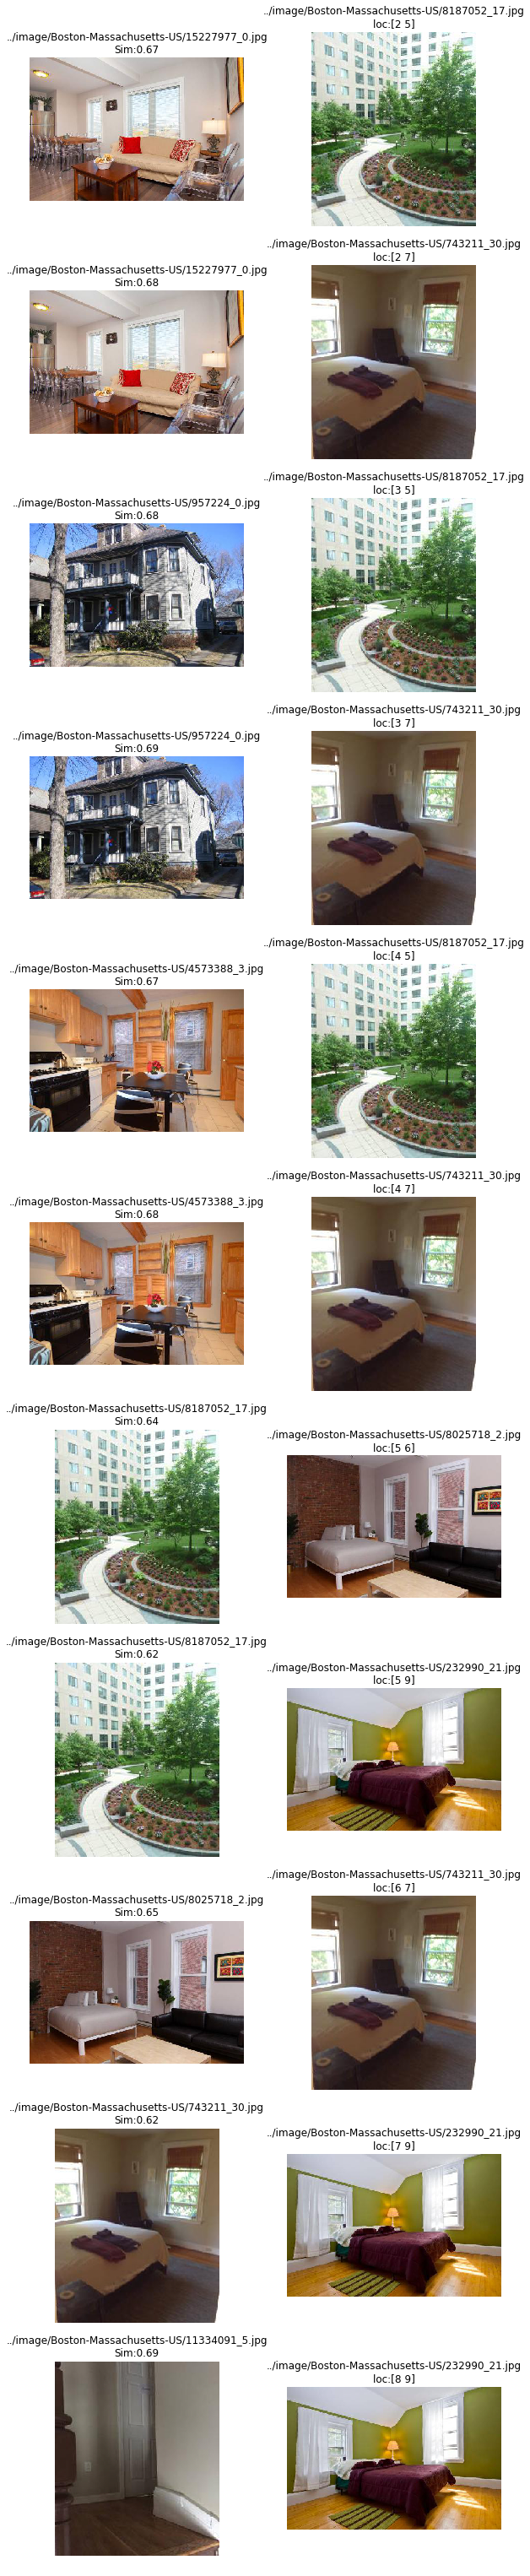

In [232]:
show_similar_images(z,0.7,img_list, True)

In [225]:
z

array([[0.92372227, 1.        , 0.79237677, 0.82767328, 0.81654891,
        0.89548898, 0.78698704, 0.86627547, 0.83475696, 0.74354892],
       [0.75763036, 0.89548898, 0.67201544, 0.67878342, 0.66562726,
        1.        , 0.64176872, 0.95721443, 0.92101802, 0.61875171],
       [0.76097375, 0.86627547, 0.67716901, 0.69034205, 0.6754991 ,
        0.95721443, 0.65198858, 1.        , 0.9393916 , 0.62408632],
       [0.7752763 , 0.83475696, 0.7360434 , 0.73389219, 0.72769806,
        0.92101802, 0.70762781, 0.9393916 , 1.        , 0.68760383]])